**Présentation du projet**
Bienvenue chez EPSI DEV! Votre première mission consiste à construire un modèle
des prix immobiliers en Californie en vous basant sur les données de recensement.
Ces données comportent un certain nombre de variables quantitatives telles que la
population, le revenu médian et le prix médian des habitations pour chacun des
“Blocks” recensés en Californie. Ces “Blocks” constituent la plus petite subdivision
pour laquelle les services américains du recensement publient des données(en
général, ils regroupent de 600 à 3000 personnes). Nous les appellerons “districts”
dans ce qui suit.
Votre modèle devra apprendre de ces données et être capable de prédire le prix
médian des habitations dans chaque district, en fonction des autres variables
connues.
Pour l’instant nous allons juste nous focaliser sur l’analyse exploratoire et le
nettoyage des données du dataset, le reste du travail sera fait par la suite lorsque
nous aurons assimiler des notions plus approfondies sur le machine learning.

In [44]:
# importation des biblio

import pandas as pd
import matplotlib.pyplot as plt
import folium

In [45]:
#importation du jeu de données

df = pd.read_csv("housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [14]:
#description du jeu de données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


9 variables quantitatives
1 variable qualitative

In [17]:
#afficher les modalités de la variable "ocean_proximity"

df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
#analyse descriptive du tableau univariée

df.describe(include= "all")

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

Text(0.5, 1.0, "Repartition des habitations par rapport à l'océan")

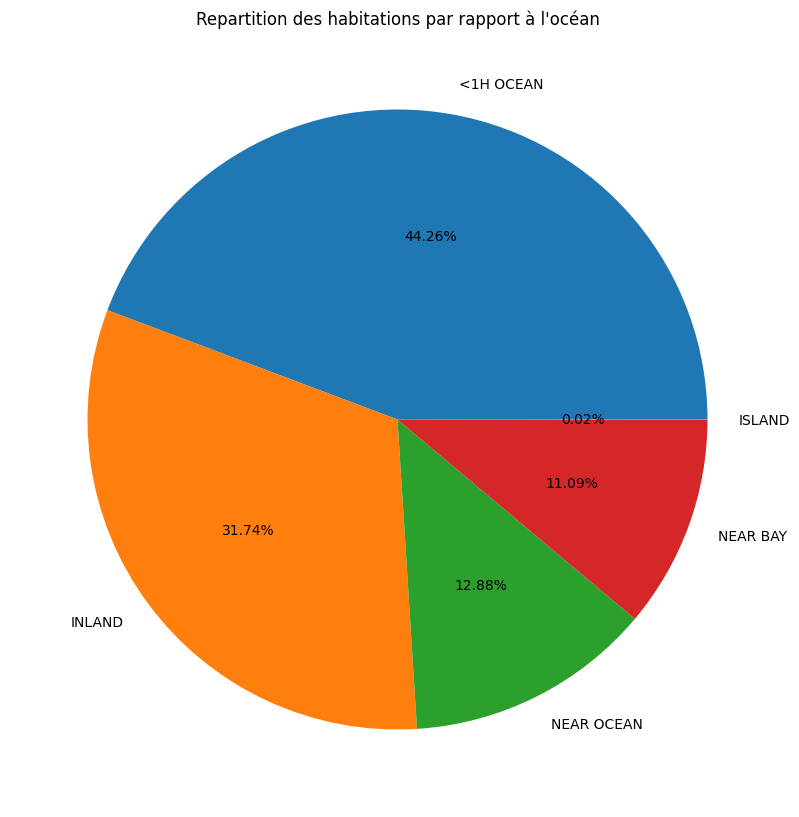

In [40]:
plt.figure(figsize=(10,20))
plt.pie(x=df['ocean_proximity'].value_counts(), labels=df['ocean_proximity'].value_counts().index, autopct='%0.2f%%')
plt.title("Repartition des habitations par rapport à l'océan")

Text(0.5, 1.0, 'Localisation des habitations')

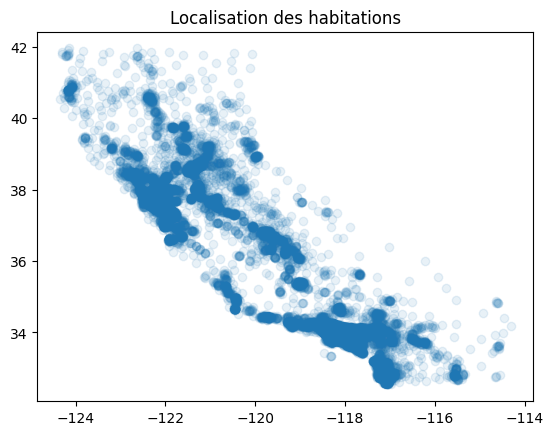

In [48]:
plt.scatter(df["longitude"], df["latitude"], alpha=0.1)
plt.title("Localisation des habitations")


In [12]:
import folium
import folium.plugins

cali_map = folium.Map(location=["36.778259", "-119.417931"], zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(cali_map)

for lat, lng, in zip(df["latitude"], df["longitude"]):
    folium.Marker([lat, lng]).add_to(marker_cluster)


cali_map

Text(0.5, 1.0, 'Rapport entre le nombre de pièces dans une habitation et sa valeur')

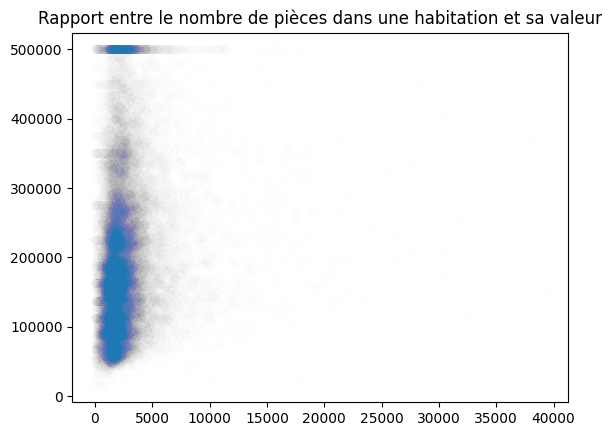

In [60]:
#nuage de point

plt.scatter(df["total_rooms"], df["median_house_value"], alpha=0.005)
plt.title("Rapport entre le nombre de pièces dans une habitation et sa valeur")

In [63]:
#coefficient de de corrélation test de Pearson

corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\thoma\AppData\Local\Temp\ipykernel_15400\2638308487.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

C:\Users\thoma\AppData\Local\Temp\ipykernel_15400\2246393702.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)


<AxesSubplot: >

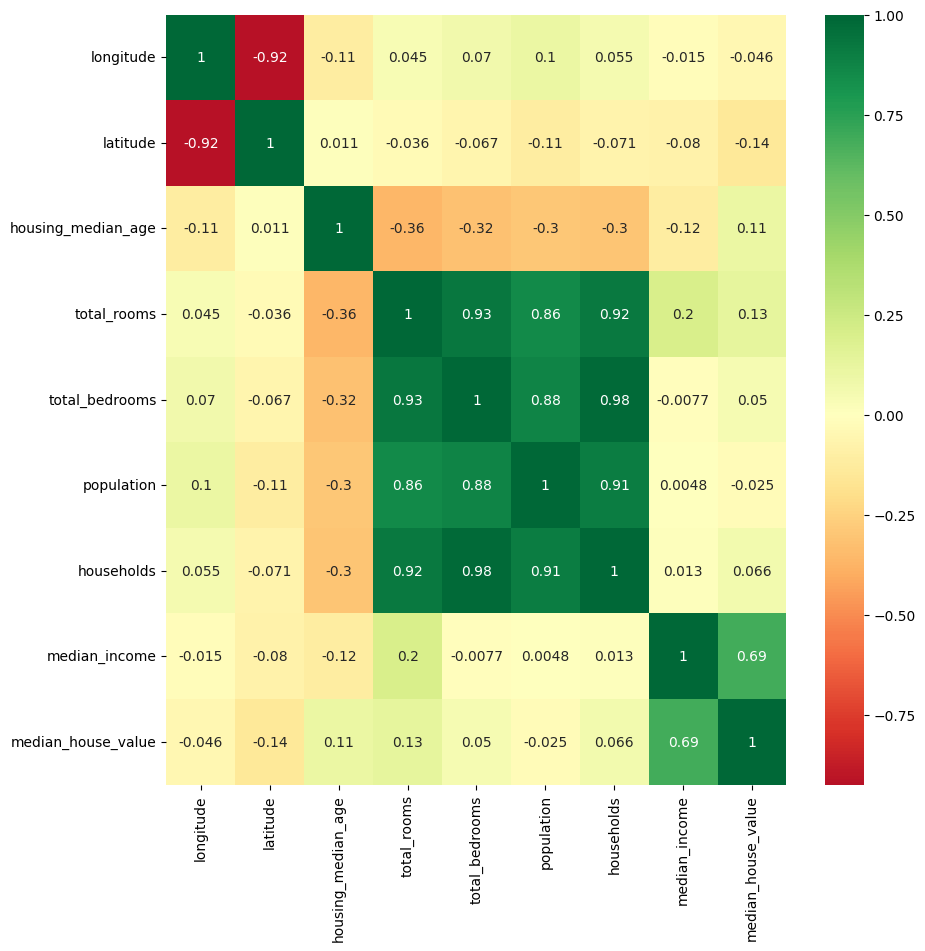

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('median_house_value ~ ocean_proximity', data=df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
anova_result

sum_sq       df            F  PR(>F)
ocean_proximity  6.543716e+13      4.0  1612.140736     0.0
Residual         2.093948e+14  20635.0          NaN     NaN

Test d'ANOVA, vérifié une corélation entre les variables, si > 0,05 = pas de corélation

In [14]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nombre de champs vide par variable

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

Détection des doublons

<AxesSubplot: >

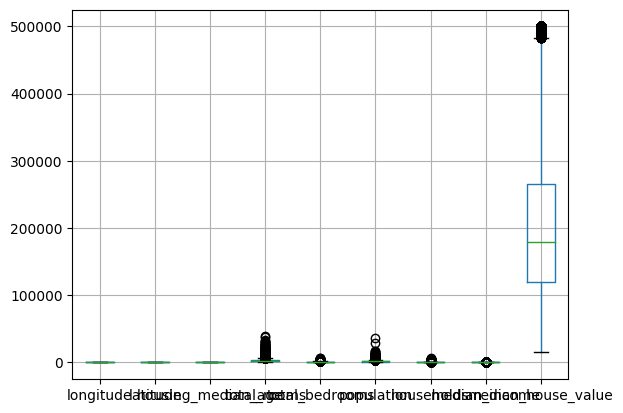

In [26]:
df.boxplot()

<AxesSubplot: ylabel='latitude'>

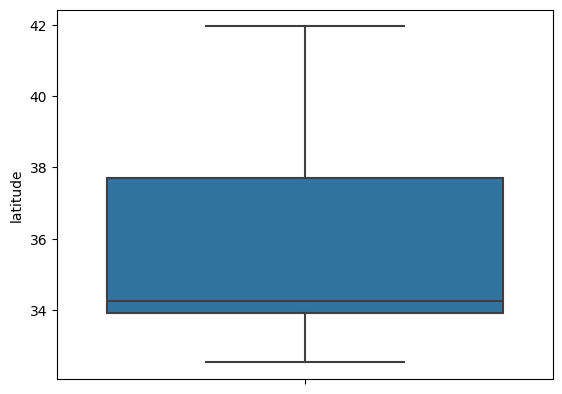

In [42]:
import seaborn as sns

sns.boxplot(y = df["latitude"])

In [51]:
# max = q3 + 1.5 * IQR
# min = q1 - 1.5 * IQR

import numpy as np

# Compute quartiles and interquartile range
q1, q3 = np.percentile(df["median_income"], [25, 75])
iqr = q3 - q1

# Compute outlier boundaries
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Filter outliers
outliers = df[(df["median_income"] > upper_bound) | (df["median_income"] < lower_bound)]

# remove from df
df = df.drop(outliers.index)

In [52]:
df.to_csv("clean_dataset.csv")